# Problem korków drogowych

Zadanie dotyczy znanego powszechnie zjawiska spowolnienia ruchu na autostradzie w godzinach wzmożonego ruchu). Pozornie może wydawać się że samochody mogłyby poruszac sie szybciej. W niniejszym ćwiczeniu - korzystając z aparatu fizycznego postaramy się sprawdzić czy tak faktycznie jest.

Założenia: 

1. Samochody poruszaja sie jeden za drugim z identyczna predkoscia $v$.
2. Wszystkie poruszajace samochody sa identyczne i maja dlugosc $L0$. 
3. Kierowcy samochodów maja ten sam czas reakcji $TR$. 
4. Kierowcy utrzymuja miedzy samochodami identyczną (bezpieczną) odleglosc $Db$ (mierzoną między zderzakami samochodów). Ta odległość jest równa sumie dwuch składnikow: $Dr$ i $Dh$. $Dr$ to droga reakcji (odległość, jaką samochód przejedzie, zanim kierowca naciśnie pedał hamulca). Dh to droga hamowania (drogą, jaką samochod przejedzie od momentu naciśniecia hamulca do momentu zatrzymania samochodu). 
5. Wszystkie samochody hamują w równie efektywny sposob - przyśpieszenie (ujemne) jakiemu ulega samochod podczas hamowania wynosi $f \cdot g$, gdzie $f$ jest współczynnikiem tarcia między oponami a powierzchnią autostrady, a $g$ to przyspieszenie ziemskie.

Uwzględniając powyższe założenia zdefiniuj wyrażenia opisujace:
1. Drogę reakcji $Dr$.
2. Drogę hamowania $Dh$ (znajdź czas $Th$, po którym prędkość spadnie do zera, a nastepnie oblicz drogę $Dh$ przebytą w tym czasie.)
3. Odległość bezpieczną $Db=Dr+Dh$.
4. Odleglość $Ds$ zajmowaną przez jeden samochód w poruszającej sie kolumnie $Ds=L0+Db$.
5. Określ $T$, z którym samochody przejeżdżają pewien nieruchomy punkt kontrolny.

Przyjmujac:
- $g=9.81~~ \rm{[m/s^2]}$,
- $f=0.5$,
- $TR=0.5~~ \rm{[s]}$,
- $L0=4~~ \rm{[m]}$,

6. Wykonaj wykres zalezności okresu T od predkości v.
7. Znajdź optymalną prędkość vopt, przy której przepustowość autostrady osiąga swe maksimum, to znaczy znajdź minimum zaleznosci $T(v)$. (W tym celu oblicz pochodną $dT/dv$ i znajdź tą wartość vopt, dla której pochodna ta równa jest 0).
8. Zbadaj, jak optymalna prędkość vopt zalezy od $f$, $TR$ i $L0$.
9. Zbadaj, jak okres T zależy od czasu reakcji kierowów TR.

Obliczenia w m/s

In [1]:
T, v, L0, g, f, TR, Dr, ah, Th, Dh, Db, Ds, T, v = var('T, v, L0, g, f, TR, Dr, ah, Th, Dh, Db, Ds, T, v')

## ad. 1: Określanie drogi reakcji (Dr)

In [2]:
Dr = v*TR
show(Dr)

TR*v

## ad. 2: Określanie drogi hamowania (Dh)

In [3]:
ah = f*g
show(ah)

f*g

In [4]:
Th = v/ah
show(Th)

v/(f*g)

In [5]:
Dh = v*Th - ah*Th**2/2
show(Dh)

1/2*v^2/(f*g)

## ad. 3: Określanie drogi bezpiecznej (Db)

In [6]:
Db = Dr + Dh
show(Db)

TR*v + 1/2*v^2/(f*g)

## ad. 4: Określanie odległości zajmowanej przez jeden samochód (Ds)

In [7]:
Ds = L0 + Db
show(Ds)

TR*v + L0 + 1/2*v^2/(f*g)

## ad. 5: Określanie okresu mijania punktu kontrolnego przez kolejne samochody (T)

In [8]:
T = Ds/v
show(T)

1/2*(2*TR*v + 2*L0 + v^2/(f*g))/v

In [9]:
T_v = T.subs(L0==3, TR==0.1, f==0.5, g==9.81)
show(T_v)

1/2*(0.203873598369011*v^2 + 0.200000000000000*v + 6)/v

## ad. 6: Wykres zależności T(v) (w metrach na sekundę)

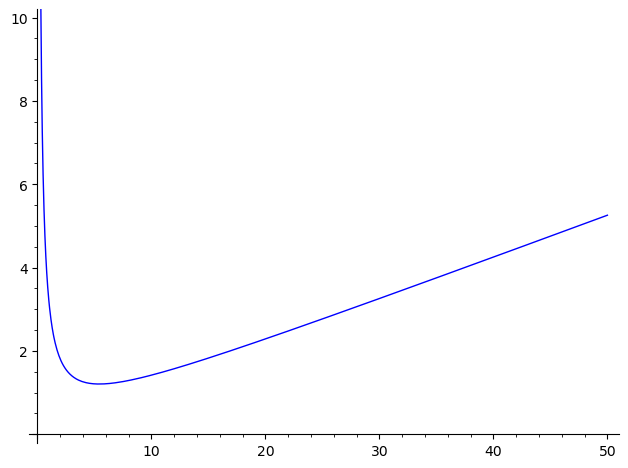

In [10]:
plot(T_v, (v, 0, 50), ymin=0, ymax=10)

Zamiana jednostek na km/h

In [12]:
vkmh = var('vkmh')

In [13]:
v = vkmh*1000/3600
show(v)

5/18*vkmh

In [14]:
Dr = v*TR
ah = f*g
Th = v/ah
Dh = v*Th - 0.5*ah*Th**2
Db = Dr + Dh
Ds = L0 + Db
T = Ds/v

In [15]:
show(T)

1/5*(5*TR*vkmh + 18*L0 + 0.694444444444444*vkmh^2/(f*g))/vkmh

In [16]:
T_dependency = T.subs(L0==3, TR==0.1, f==0.5, g==9.81)

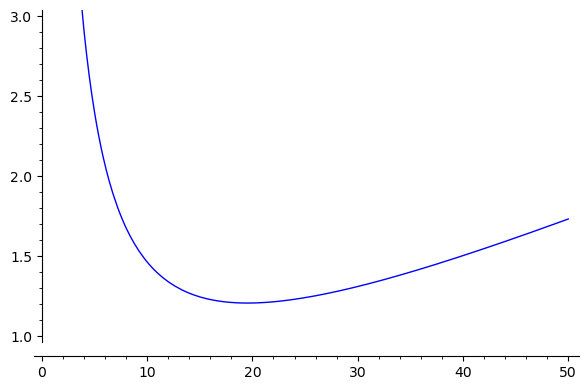

In [17]:
plot(T_dependency, (vkmh, 0, 50), ymin = 1, ymax = 3)

## ad. 7: Wyznaczanie prędkości optymalnej (vopt)

In [18]:
T_dependency.find_local_minimum(10, 30)

(1.206002527218662, 19.529792625376476)

In [19]:
Tprim = diff(T, vkmh)
show(Tprim)

1/5*(5*TR + 1.38888888888889*vkmh/(f*g))/vkmh - 1/5*(5*TR*vkmh + 18*L0 + 0.694444444444444*vkmh^2/(f*g))/vkmh^2

In [20]:
solve(Tprim, vkmh)

[vkmh == -18/5*sqrt(2)*sqrt(L0*f*g), vkmh == 18/5*sqrt(2)*sqrt(L0*f*g)]

In [21]:
vopt = solve(Tprim, vkmh)[1].rhs()
show(vopt)

18/5*sqrt(2)*sqrt(L0*f*g)

In [21]:
vopt_value = round(N(vopt.subs(L0==3, TR==0.5, f==0.5, g==9.81)), 4)
show(vopt_value)

19.5298

## ad. 8: Badanie zależności vopt od f, TR i L0

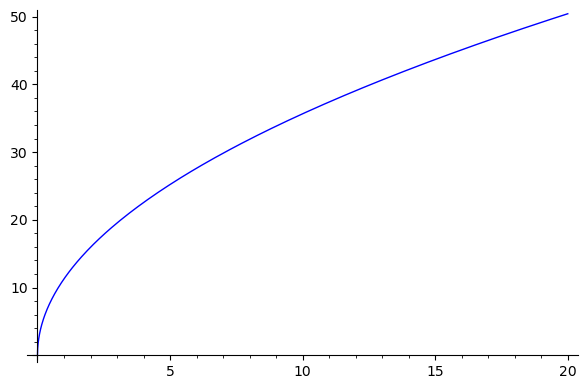

In [22]:
vopt_dependency = vopt.subs(TR==0.5, f==0.5, g==9.81)
plot(vopt_dependency, (L0, 0, 20), ymin = 0, ymax = 50)

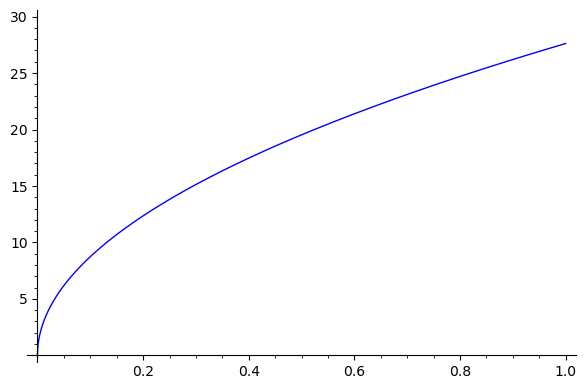

In [23]:
vopt_dependency = vopt.subs(L0==3, TR==0.5, g==9.81)
plot(vopt_dependency, (f, 0, 1), ymin = 0, ymax = 30)

## ad. 9: Badanie zależności T(v) dla różnych czasów reakcji (TR)

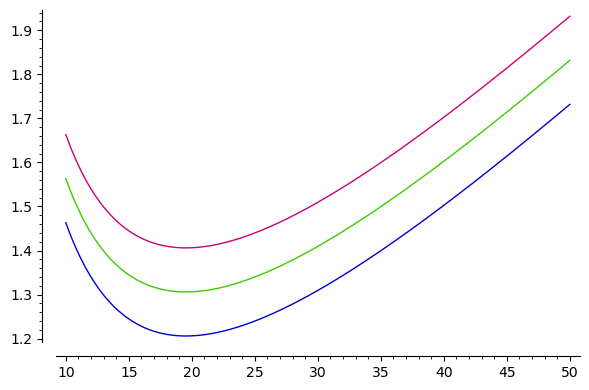

In [24]:
Td1 = T.subs(L0 == 3, f == 0.5, g == 9.81, TR == 0.1)
Td2 = T.subs(L0 == 3, f == 0.5, g == 9.81, TR == 0.2)
Td3 = T.subs(L0 == 3, f == 0.5, g == 9.81, TR == 0.3)
plot((Td1, Td2, Td3), (vkmh, 10, 50))